In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
pd.set_option("display.width",200)

In [4]:
cms_geo_path = "../data/cleaned/geo_2023.csv"
cms_prescribers_path = "../data/cleaned/prescribers_2023.csv"
cms_drug_geo_path = "../data/cleaned/drug_geo_2023.csv"
sdoh_path = "../data/cleaned/sdoh_2024.csv"

In [31]:
#Read files
df_geo = pd.read_csv(cms_geo_path)
df_prescribers = pd.read_csv(cms_prescribers_path)
df_drug_geo = pd.read_csv(cms_drug_geo_path)
df_sdh = pd.read_csv(sdoh_path,header=0)

/var/folders/3p/l7x9nvb10398yg6vv8kxpstr0000gn/T/ipykernel_60423/636440422.py:3: DtypeWarning: Columns (16,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df_prescribers = pd.read_csv(cms_prescribers_path)
/var/folders/3p/l7x9nvb10398yg6vv8kxpstr0000gn/T/ipykernel_60423/636440422.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_drug_geo = pd.read_csv(cms_drug_geo_path)


In [32]:
print(type(df_geo))
print(type(df_prescribers))
print(type(df_drug_geo))
print(type(df_sdh))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [7]:
#Standardize Column Names
#df_geo.columns = df_geo.columns.str.lower().str.strip().str.replace(" ", "_").str.replace("-", "_").str.replace("%", "pct").str.replace(r"[()]", "", regex=True)
#df_prescribers.columns = df_prescribers.columns.str.lower().str.strip().str.replace(" ", "_").str.replace("-", "_").str.replace("%", "pct").str.replace(r"[()]", "", regex=True)
#df_drug_geo.columns = df_drug_geo.columns.str.lower().str.strip().str.replace(" ", "_").str.replace("-", "_").str.replace("%", "pct").str.replace(r"[()]", "", regex=True)
#df_sdh.columns = df_sdh.columns.str.lower().str.strip().str.replace(" ", "_").str.replace("-", "_").str.replace("%", "pct").str.replace(r"[()]", "", regex=True)


In [33]:
#understand data structure
print("df_geo shape:", df_geo.shape)
print("df_prescriber shape:", df_prescribers.shape)
print("df_drug_geo shape:", df_drug_geo.shape)
print("df_sdh shape:", df_sdh.shape)
print("\nMissing top 10 in df_geo:", df_geo.isnull().mean().sort_values(ascending=False).head(10))
print("\nMissing top 10 in df_prescriber:", df_prescribers.isnull().mean().sort_values(ascending=False).head(10))
print("\nMissing top 10 in df_drug_geo:", df_drug_geo.isnull().mean().sort_values(ascending=False).head(10))
print("\nMissing top 10 in df_sdh:", df_sdh.isnull().mean().sort_values(ascending=False).head(10))
print("\nTop 10 in df_geo:", df_geo.dtypes.head(10))
print("\nTop 10 in df_prescriber:", df_prescribers.dtypes.head(10))
print("\nTop 10 in df_drug_geo:", df_drug_geo.dtypes.head(10))
print("\nTop 10 in df_sdh:", df_sdh.dtypes.head(10))
print("\nColumns in df_geo:", df_geo.columns.tolist())
print("\nColumns in df_prescriber:", df_prescribers.columns.tolist())
print("\nColumns in df_drug_geo:", df_drug_geo.columns.tolist())
print("\nColumns in df_sdh:", df_sdh.columns.tolist())

df_geo shape: (328890, 19)
df_prescriber shape: (13220111, 87)
df_drug_geo shape: (1233548, 23)
df_sdh shape: (3201, 272)

Missing top 10 in df_geo: la_opioid_prscrbng_rate_5y_chg    0.690863
opioid_prscrbng_rate_5y_chg       0.589808
la_opioid_prscrbng_rate_1y_chg    0.378181
ruca_cd                           0.323634
la_opioid_prscrbng_rate           0.264994
opioid_prscrbng_rate_1y_chg       0.247998
la_tot_opioid_clms                0.145608
opioid_prscrbng_rate              0.143039
tot_opioid_clms                   0.062386
tot_prscrbrs                      0.014959
dtype: float64

Missing top 10 in df_prescriber: gnrc_sprsn_flag           0.970399
prscrbr_type_src.1        0.895563
prscrbr_npi.1             0.895563
pdp_sprsn_flag            0.808017
mapd_sprsn_flag           0.808017
nonlis_sprsn_flag         0.790645
lis_sprsn_flag            0.790645
ge65_sprsn_flag           0.773307
opioid_la_prscrbr_rate    0.697219
bene_age_gt_84_cnt        0.695714
dtype: float64

Missin

In [36]:
# Create FIPS (5-digit county code) where available
# Create FIPS (5-digit county code) where available
for df in [df_geo, df_drug_geo]:
    if "prscrbr_geo_cd" in df.columns:
        df["fips"] = df["prscrbr_geo_cd"].astype(str).str.zfill(5)

# Keep county-level only (geo files often include state/zip too)
def county_only(df):
    if "prscrbr_geo_lvl" in df.columns:
        return df[df["prscrbr_geo_lvl"].str.lower().str.contains("county", na=False)].copy()
    return df

df_geo_c = county_only(df_geo)
df_dg_c  = county_only(df_drug_geo)

print(df_geo_c[["year","fips"]].head())
print(df_dg_c[["year","fips"]].head())


     year    fips
171  2023  1001.0
172  2023  1003.0
173  2023  1005.0
174  2023  1007.0
175  2023  1009.0
Empty DataFrame
Columns: [year, fips]
Index: []


In [37]:
#Descriptive stats

print("\nDescriptive statistics for df_geo:\n", df_geo.describe().T)
print("\nDescriptive statistics for df_prescriber:\n", df_prescribers.describe().T)
print("\nDescriptive statistics for df_drug_geo:\n", df_drug_geo.describe().T)
print("\nDescriptive statistics for df_sdh:\n", df_sdh.describe().T)



Descriptive statistics for df_geo:
                                    count           mean           std      min       25%        50%        75%           max
year                            328890.0    2018.024434  3.168213e+00  2013.00   2015.00   2018.000    2021.00  2.023000e+03
prscrbr_geo_cd                  328857.0   42554.326811  2.673939e+04     1.00  20372.00  39045.000   60525.00  9.992900e+04
ruca_cd                         222450.0       3.643253  7.396814e+00     1.00      1.00      1.000       5.00  9.900000e+01
tot_prscrbrs                    323970.0     285.213680  9.647430e+03     0.00      3.00     15.000      66.00  1.379131e+06
tot_opioid_prscrbrs             323970.0     191.227277  6.410196e+03     0.00      2.00     11.000      44.00  8.209590e+05
tot_opioid_clms                 308372.0   17534.022139  5.626827e+05     0.00    145.00   1257.000    5165.25  8.103456e+07
tot_clms                        323970.0  353134.892336  1.157374e+07     0.00   2995.00

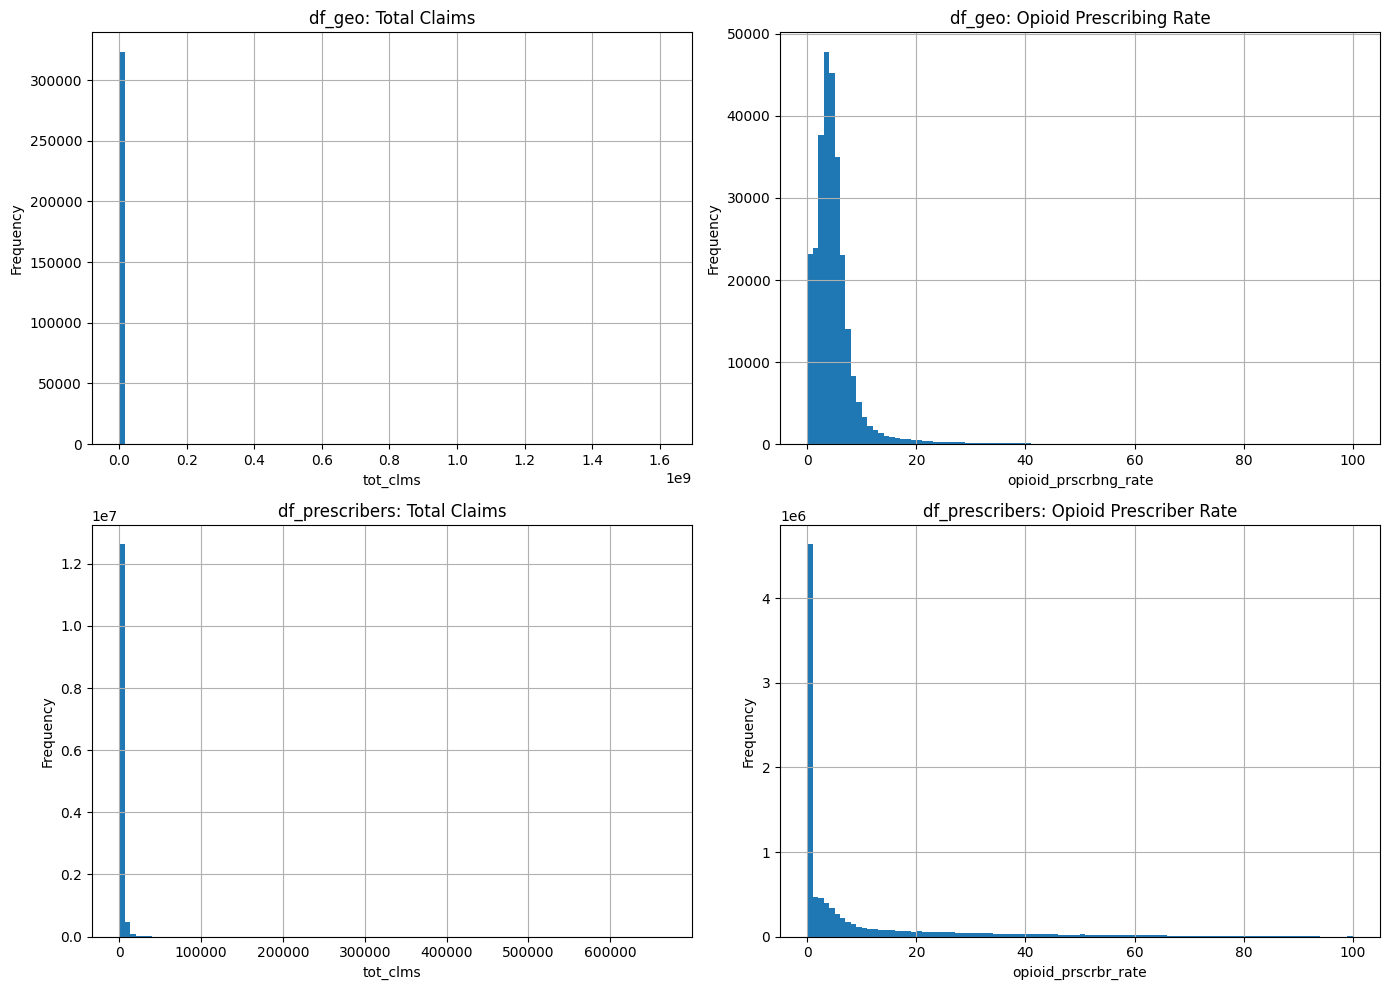

In [39]:
#Histogram plot
import matplotlib.pyplot as plt

# List of plots: (dataframe, column_name, title)
plot_list = [
    (df_geo, 'tot_clms', 'df_geo: Total Claims'),
    (df_geo, 'opioid_prscrbng_rate', 'df_geo: Opioid Prescribing Rate'),
    (df_prescribers, 'tot_clms', 'df_prescribers: Total Claims'),
    (df_prescribers, 'opioid_prscrbr_rate', 'df_prescribers: Opioid Prescriber Rate'),
]

plt.figure(figsize=(14, 10))

for i, (df, col, title) in enumerate(plot_list, 1):
    plt.subplot(2, 2, i)
    df[col].dropna().hist(bins=100)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


,tot_clms,tot_opioid_clms,opioid_prscrbng_rate,la_tot_opioid_clms,la_opioid_prscrbng_rate
count,3.239700e+05,3.083720e+05,281846.000000,2.810010e+05,241736.000000
mean,3.531349e+05,1.753402e+04,5.052888,2.294805e+03,9.657684
std,1.157374e+07,5.626827e+05,5.237242,7.235050e+04,7.466522
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.995000e+03,1.450000e+02,2.660000,1.100000e+01,4.040000
50%,2.808000e+04,1.257000e+03,4.170000,1.200000e+02,8.800000
75%,1.101915e+05,5.165250e+03,5.940000,5.660000e+02,14.020000
max,1.614516e+09,8.103456e+07,100.000000,1.042950e+07,100.000000


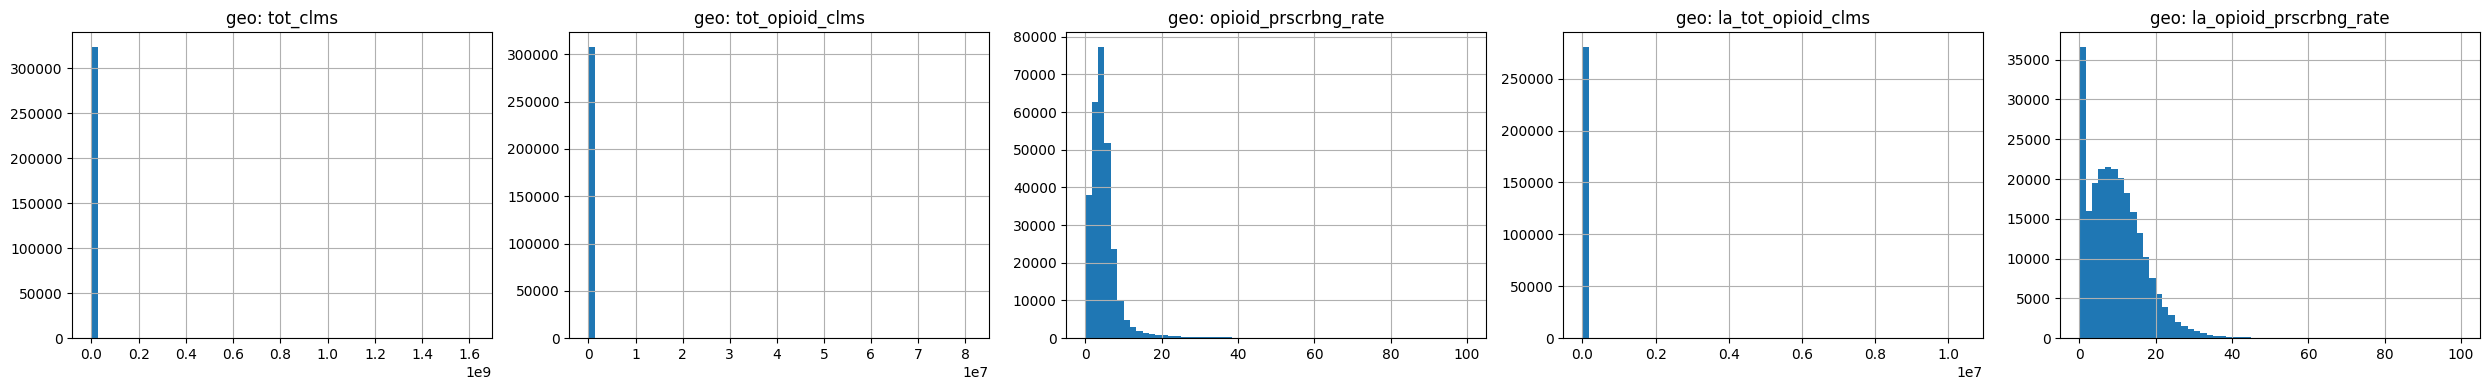

In [40]:
#skew check

geo_cols = [c for c in ["tot_clms","tot_opioid_clms","opioid_prscrbng_rate","la_tot_opioid_clms","la_opioid_prscrbng_rate"] if c in df_geo.columns]
display(df_geo[geo_cols].describe())

fig, axes = plt.subplots(1, len(geo_cols), figsize=(5*len(geo_cols),4))
if len(geo_cols)==1: axes=[axes]
for ax, c in zip(axes, geo_cols):
    df_geo[c].dropna().hist(bins=60, ax=ax)
    ax.set_title(f"geo: {c}")
plt.tight_layout(); plt.show()


,tot_clms,tot_drug_cst,opioid_tot_clms,opioid_tot_drug_cst,opioid_prscrbr_rate
count,1.322011e+07,1.322011e+07,9.550170e+06,9.550170e+06,9.550170e+06
mean,1.237437e+03,1.470370e+05,7.983533e+01,3.662169e+03,9.032020e+00
std,3.007677e+03,4.353736e+05,2.930185e+02,2.667793e+04,1.610186e+01
min,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.400000e+01,1.609710e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.960000e+02,1.050048e+04,1.300000e+01,7.501000e+01,1.306841e+00
75%,9.570000e+02,1.068659e+05,5.300000e+01,6.831400e+02,9.543568e+00
max,6.662510e+05,1.602919e+08,3.220900e+04,8.504571e+06,1.000000e+02


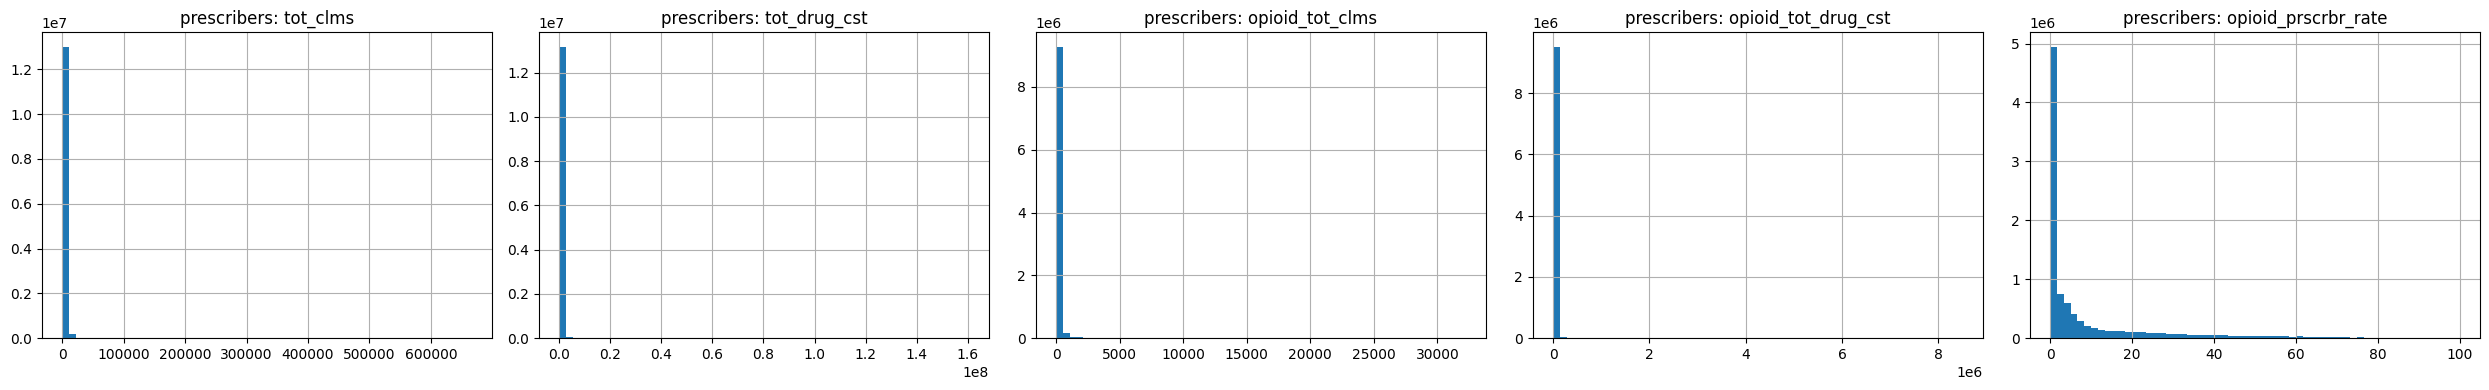

In [41]:
#Prescribers
pr_cols = [c for c in ["tot_clms","tot_drug_cst","opioid_tot_clms","opioid_tot_drug_cst","opioid_prscrbr_rate"] if c in df_prescribers.columns]
display(df_prescribers[pr_cols].describe())

fig, axes = plt.subplots(1, len(pr_cols), figsize=(5*len(pr_cols),4))
if len(pr_cols)==1: axes=[axes]
for ax, c in zip(axes, pr_cols):
    df_prescribers[c].dropna().hist(bins=60, ax=ax)
    ax.set_title(f"prescribers: {c}")
plt.tight_layout(); plt.show()


,tot_clms,tot_drug_cst,tot_30day_fills,tot_benes,ge65_tot_drug_cst
count,1.233548e+06,1.233548e+06,1.233548e+06,1.009613e+06,1.010416e+06
mean,2.654276e+04,3.151144e+06,4.320719e+04,8.868061e+03,2.761375e+06
std,4.313589e+05,5.107997e+07,8.197376e+05,1.179313e+05,4.683274e+07
min,1.100000e+01,0.000000e+00,1.100000e+01,1.100000e+01,0.000000e+00
25%,5.200000e+01,1.258504e+04,6.600000e+01,3.800000e+01,1.355126e+04
50%,2.830000e+02,8.937023e+04,3.667000e+02,1.670000e+02,9.267354e+04
75%,2.587000e+03,6.119357e+05,3.483400e+03,1.261000e+03,5.622591e+05
max,6.846728e+07,1.826613e+10,1.679827e+08,1.677038e+07,1.716443e+10


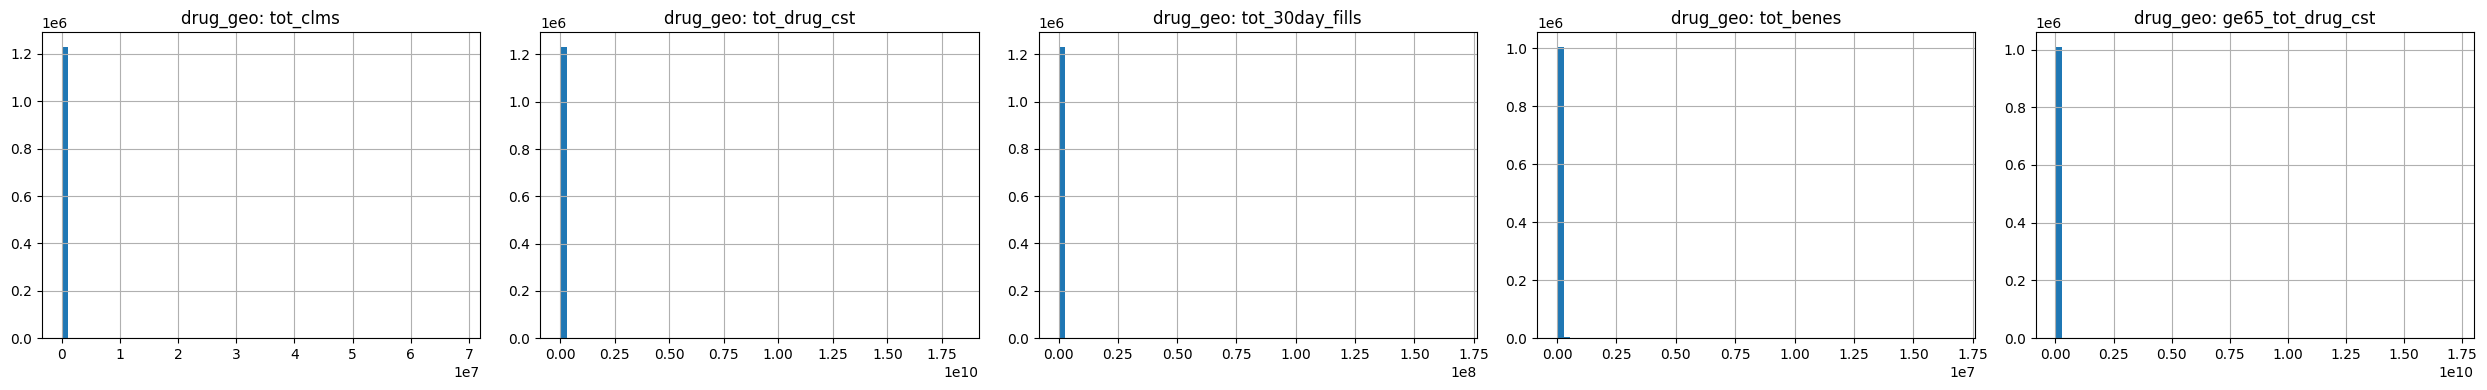

In [42]:
#DrugxGeo
dg_cols = [c for c in ["tot_clms","tot_drug_cst","tot_30day_fills","tot_benes","ge65_tot_drug_cst"] if c in df_drug_geo.columns]
display(df_drug_geo[dg_cols].describe())

fig, axes = plt.subplots(1, len(dg_cols), figsize=(5*len(dg_cols),4))
if len(dg_cols)==1: axes=[axes]
for ax, c in zip(axes, dg_cols):
    df_drug_geo[c].dropna().hist(bins=60, ax=ax)
    ax.set_title(f"drug_geo: {c}")
plt.tight_layout(); plt.show()


,fips,pct_adults_reporting_currently_smoking,pct_adults_with_obesity,pct_excessive_drinking,pct_uninsured,primary_care_physicians_rate,mental_health_provider_rate,population,pct_unemployed,pct_children_in_poverty,income_ratio,injury_death_rate,pct_severe_housing_problems
count,3201.000000,3194.000000,3194.000000,3194.000000,3193.000000,3037.000000,3009.000000,3.194000e+03,3193.000000,3193.000000,3179.000000,3088.000000,3194.000000
mean,30319.639488,18.979869,37.292642,16.894693,11.489230,53.881165,201.420832,1.418917e+05,3.591533,19.367303,4.552661,96.069451,12.851362
std,15209.064290,4.110126,4.576466,2.635013,5.251361,36.684769,221.356638,8.658459e+05,1.224768,8.360806,0.803403,28.495495,4.401615
min,1000.000000,7.000000,17.400000,9.038096,2.389743,0.000000,0.000000,5.000000e+01,0.572082,2.400000,1.651643,26.625917,0.000000
25%,18165.000000,16.400000,35.000000,15.066428,7.462405,29.726520,62.344140,7.653000e+03,2.729868,13.400000,4.019159,76.820195,10.208985
50%,29171.000000,18.700000,37.600000,16.910390,10.341124,47.400100,140.863530,1.851100e+04,3.414634,18.000000,4.435789,93.517419,12.250041
75%,45075.000000,21.500000,40.200000,18.551266,14.548814,71.728880,263.679970,5.065600e+04,4.200831,24.000000,4.945139,110.955984,14.776089
max,56045.000000,43.000000,52.500000,26.797762,46.323529,580.527450,3407.856370,2.684270e+07,14.667733,88.700000,10.532338,315.568022,61.142857


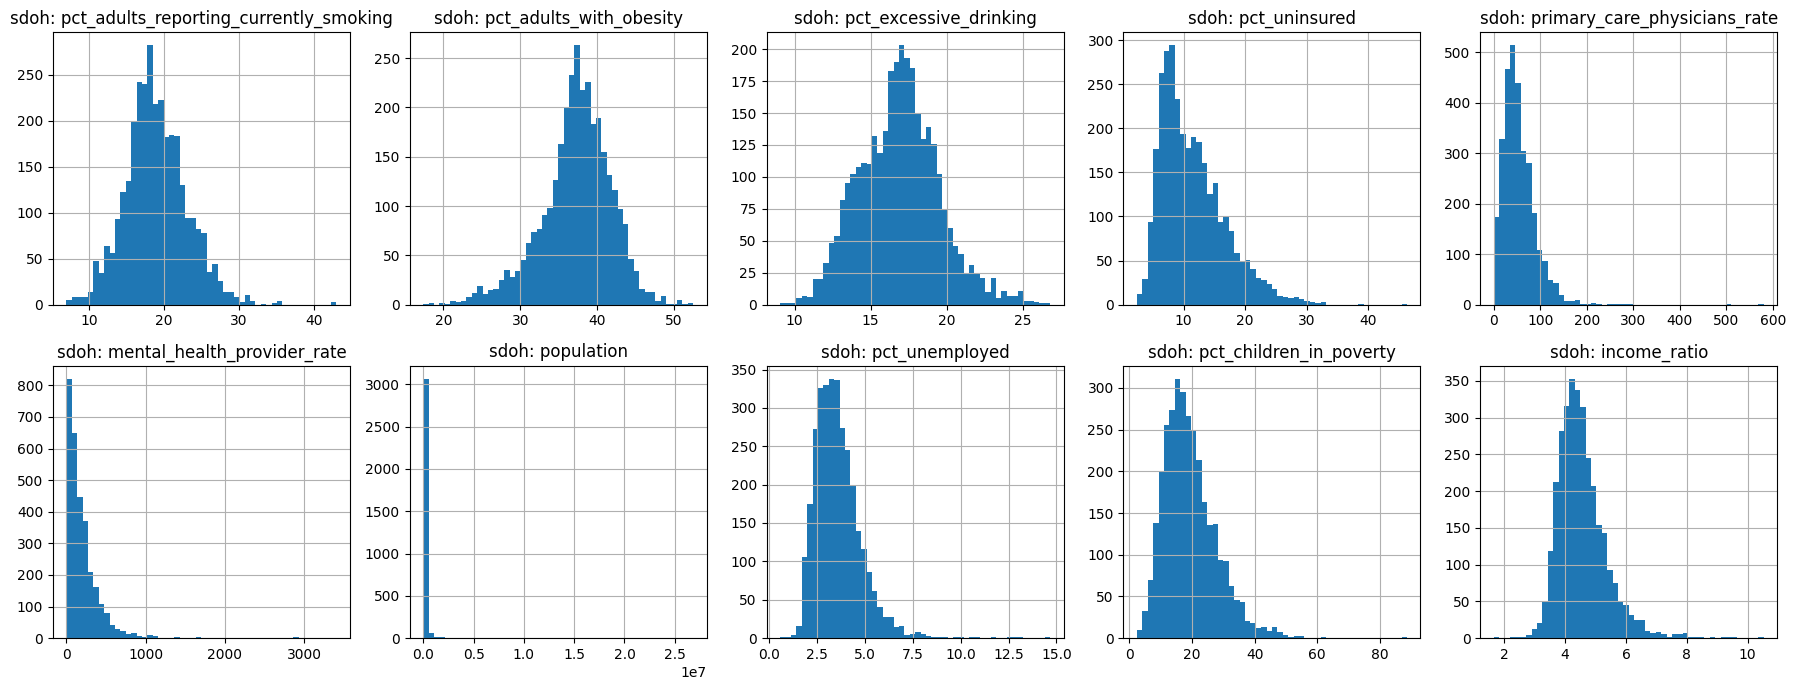

In [43]:
#SDOH
sdoh_keep = [c for c in df_sdh.columns if c in [
    "fips","state","county",
    "pct_uninsured","pct_unemployed","pct_children_in_poverty","income_ratio",
    "mental_health_provider_rate","primary_care_physicians_rate",
    "pct_adults_reporting_currently_smoking","pct_adults_with_obesity","pct_excessive_drinking",
    "pct_severe_housing_problems","injury_death_rate","population"
]]
display(df_sdh[sdoh_keep].describe())

num_cols = [c for c in sdoh_keep if c!="fips" and df_sdh[c].dtype!=object]
fig, axes = plt.subplots(2, min(5,len(num_cols)), figsize=(18,7))
axes = axes.ravel()
for ax, c in zip(axes, num_cols[:len(axes)]):
    df_sdh[c].dropna().hist(bins=50, ax=ax)
    ax.set_title(f"sdoh: {c}")
plt.tight_layout(); plt.show()



geo describe:
                          count           mean           std  min  25%      50%        75%          max
tot_clms              104412.0  313047.027449  1.156778e+06  0.0  0.0  47732.5  186860.00  41960743.00
tot_opioid_clms       102833.0   14950.703451  4.896605e+04  0.0  0.0   2009.0    8627.00   1668725.00
opioid_prscrbng_rate   76387.0       4.753910  2.672694e+00  0.0  3.3      4.5       5.87        72.22
la_tot_opioid_clms     97221.0    1884.841212  6.208325e+03  0.0  0.0    171.0     917.00    171239.00


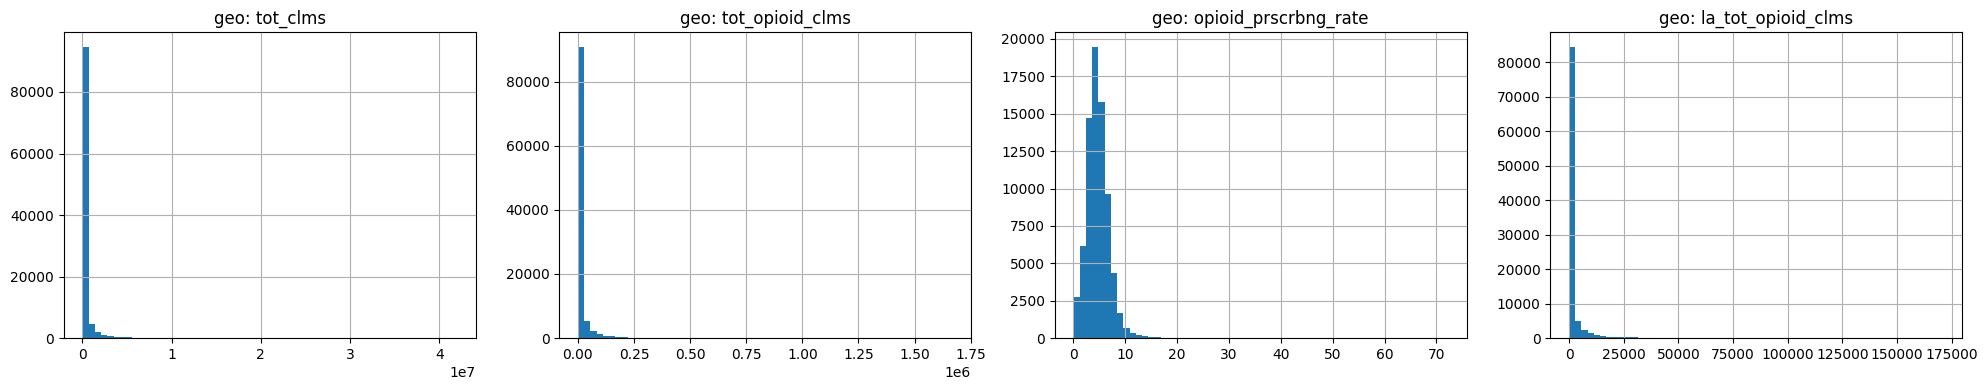


prescribers describe:
                           count           mean            std   min      25%           50%            75%           max
tot_clms             13220111.0    1237.437449    3007.677306  11.0    54.00    196.000000     957.000000  6.662510e+05
tot_drug_cst         13220111.0  147036.966943  435373.619852   0.0  1609.71  10500.480000  106865.920000  1.602919e+08
opioid_tot_clms       9550170.0      79.835334     293.018504   0.0     0.00     13.000000      53.000000  3.220900e+04
opioid_tot_drug_cst   9550170.0    3662.169270   26677.929409   0.0     0.00     75.010000     683.140000  8.504571e+06
opioid_prscrbr_rate   9550170.0       9.032020      16.101862   0.0     0.00      1.306841       9.543568  1.000000e+02


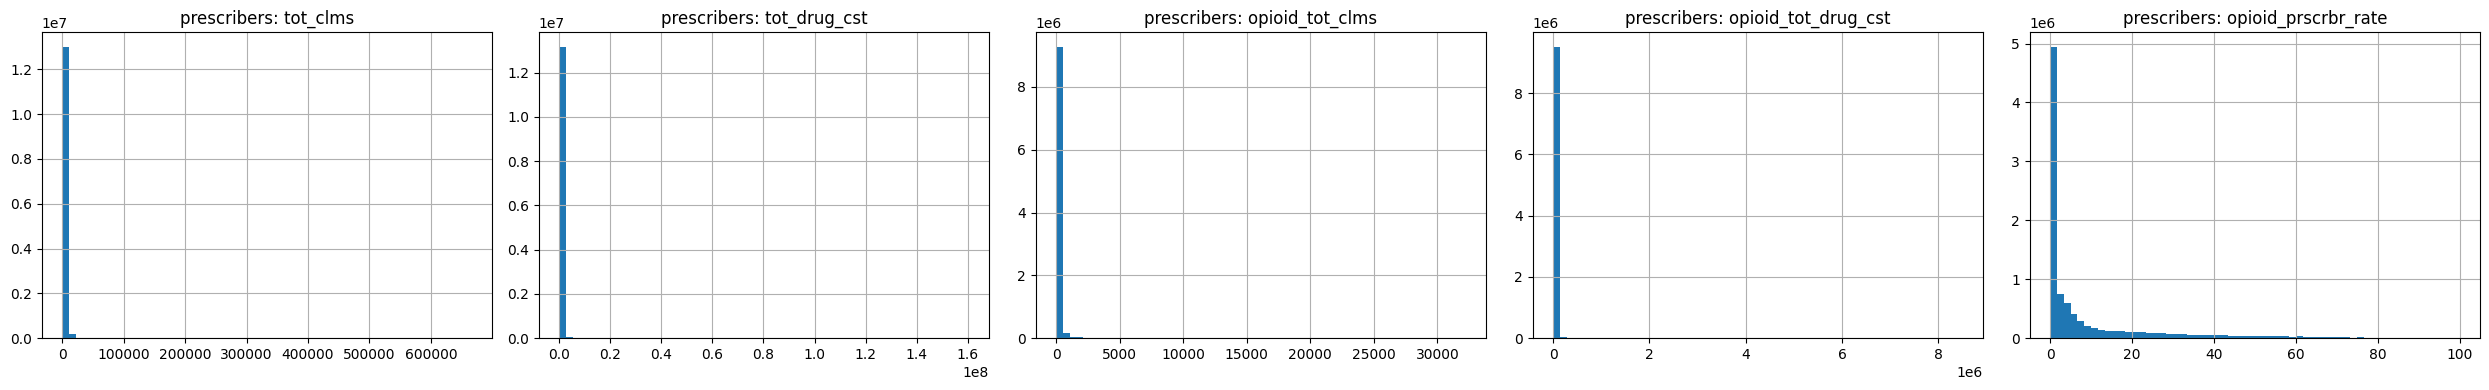


drug_geo describe:
                  count  mean  std  min  25%  50%  75%  max
tot_clms           0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
tot_drug_cst       0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
tot_30day_fills    0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN
tot_benes          0.0   NaN  NaN  NaN  NaN  NaN  NaN  NaN


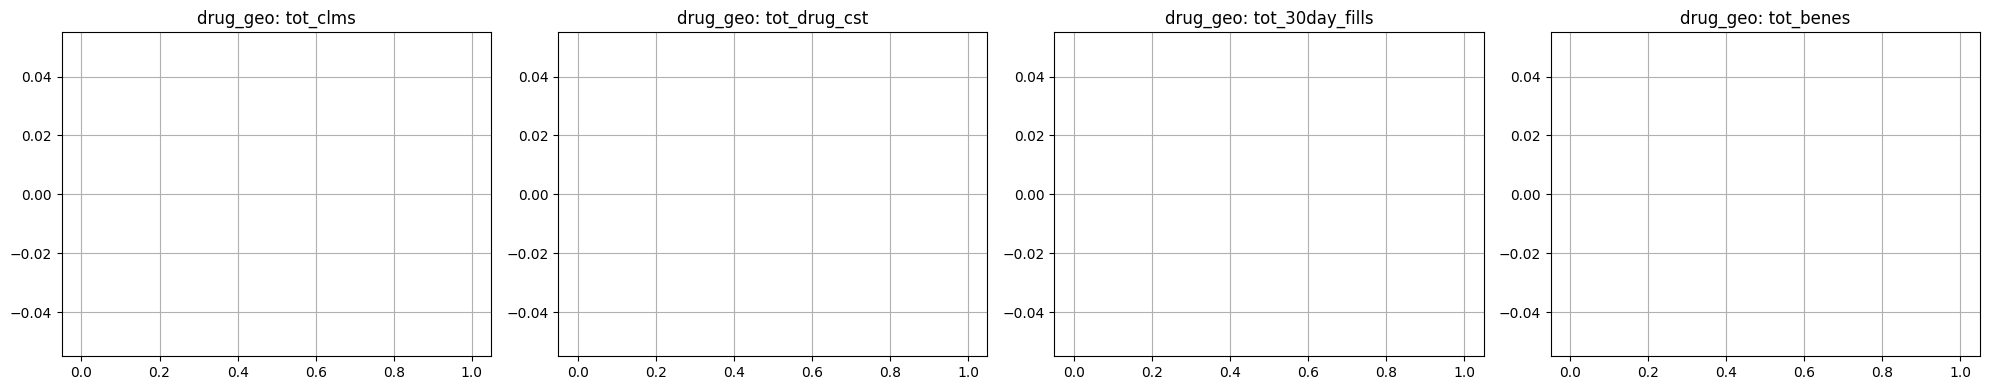

In [44]:
# Choose key numeric columns if present
geo_cols = [c for c in ["tot_clms","tot_opioid_clms","opioid_prscrbng_rate","la_tot_opioid_clms"] if c in df_geo_c.columns]
presc_cols = [c for c in ["tot_clms","tot_drug_cst","opioid_tot_clms","opioid_tot_drug_cst","opioid_prscrbr_rate"] if c in df_prescribers.columns]
dg_cols = [c for c in ["tot_clms","tot_drug_cst","tot_30day_fills","tot_benes"] if c in df_dg_c.columns]

for name, df, cols in [("geo",df_geo_c,geo_cols),("prescribers",df_prescribers,presc_cols),("drug_geo",df_dg_c,dg_cols)]:
    if cols:
        print(f"\n{name} describe:\n", df[cols].describe().T)

        n = len(cols)
        fig, axes = plt.subplots(1, n, figsize=(5*n,4))
        if n==1: axes=[axes]
        for ax, c in zip(axes, cols):
            df[c].dropna().hist(bins=60, ax=ax)
            ax.set_title(f"{name}: {c}")
        plt.tight_layout(); plt.show()


In [ ]:
# 1) Drop rows missing join keys after inspection:
#    - df_geo: prscrbr_geo_lvl + prscrbr_geo_cd (we will use COUNTY level)
#    - df_sdh: fips (5-digit)
# 2) For predictors with small % missing: impute median; also add a _missing flag if desired.


In [45]:
#EDA Report
eda_summary = {
    "geo_rows": df_geo.shape[0],
    "prescriber_rows": df_prescribers.shape[0],
    "drug_geo_rows": df_drug_geo.shape[0],
    "sdoh_rows": df_sdh.shape[0]
}
pd.Series(eda_summary).to_csv("../data/results/tables/eda_counts.csv")


In [46]:
# Example: drop rows with missing FIPS (cannot join to SDOH)
df_geo_c = df_geo_c[df_geo_c["fips"].notna()].copy()
df_dg_c  = df_dg_c[df_dg_c["fips"].notna()].copy()

# impute small missing SDOH later with medians.